In [1]:
import numpy as np
import pandas as pd
import pickle
import pathlib
import matplotlib.pyplot as plt

In [2]:
def save_model(clf, name, path='./models/', overwrite=False):
    _file = pathlib.Path(path+name)
    if _file.exists():
        if overwrite:
                _file.unlink()
        else:
            print('%s file already exists' % (str(path+name)))
            return
    with open(path+name, 'xb') as f:
        pickle.dump(clf, f)
    
def load_model(name, path='./models/'):
    return pickle.load(open(path+name, 'rb'))

# Synthetic Dataset

In [3]:
from sklearn.model_selection import train_test_split

n_samples = 20
np.random.seed(1)
X = np.random.uniform(0,2*2*3.14,n_samples).reshape(-1,1)
y = np.sin(X) + np.random.normal(0,.2,n_samples).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Gaussian Process Regression - GPy

In [4]:
import GPy

kernel = GPy.kern.RBF(1, variance=1, lengthscale=1)
model = GPy.models.GPRegression(X_train,y_train,kernel=kernel,noise_var=1e-2)

for i in range(10):
    print('Iteration %2i: variance=%.2f, lengthscale=%.2f' % (i, model.rbf.variance.values[0], model.rbf.lengthscale.values[0]))
    model.optimize('bfgs', max_iters=100) #first runs EP to approximate the posterior, then optimizes the kernel parameters

warning in stationary: failed to import cython module: falling back to numpy
warning in coregionalize: failed to import cython module: falling back to numpy
warning in choleskies: failed to import cython module: falling back to numpy
Iteration  0: variance=1.00, lengthscale=1.00
Iteration  1: variance=0.76, lengthscale=1.52
Iteration  2: variance=0.76, lengthscale=1.52
Iteration  3: variance=0.76, lengthscale=1.52
Iteration  4: variance=0.76, lengthscale=1.52
Iteration  5: variance=0.76, lengthscale=1.52
Iteration  6: variance=0.76, lengthscale=1.52
Iteration  7: variance=0.76, lengthscale=1.52
Iteration  8: variance=0.76, lengthscale=1.52
Iteration  9: variance=0.76, lengthscale=1.52


# Plot results

MSE: 0.173


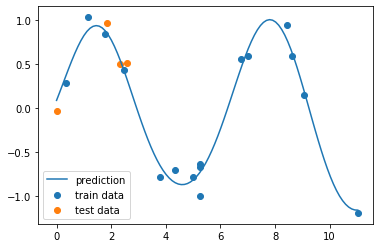

In [5]:
plt.scatter(X_train.tolist(), y_train.tolist(), label='train data')
plt.scatter(X_test.tolist(), y_test.tolist(), label='test data')
x_post = np.linspace(np.min(X), np.max(X), 100)
plt.plot(x_post.tolist(), model.predict(x_post.reshape(-1,1))[0].tolist(), label='prediction')
plt.legend()

print('MSE: %.3f' % np.mean(np.square(model.predict(X_test)-y_test)))